<a href="https://colab.research.google.com/github/VannivignesherJ/Amazon-python-project/blob/main/amazon_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
amz_data=pd.read_excel("/content/Amazon 4.xlsx")
print(amz_data.head())

         Order ID Order Date  Ship Date   Status   Customer Name  \
0  CA-2013-138688 2013-06-13 2013-06-17  On time   DarrinVanHuff   
1  CA-2011-115812 2011-06-09 2011-06-14    Delay  BrosinaHoffman   
2  CA-2011-115812 2011-06-09 2011-06-14    Delay  BrosinaHoffman   
3  CA-2011-115812 2011-06-09 2011-06-14    Delay  BrosinaHoffman   
4  CA-2011-115812 2011-06-09 2011-06-14    Delay  BrosinaHoffman   

         Country         City       State     Category  \
0  United States  Los Angeles  California       Labels   
1  United States  Los Angeles  California  Furnishings   
2  United States  Los Angeles  California          Art   
3  United States  Los Angeles  California       Phones   
4  United States  Los Angeles  California      Binders   

                                        Product Name    Sales  Quantity  \
0  Self-Adhesive Address Labels for Typewriters b...   14.620         2   
1  Eldon Expressions Wood and Plastic Desk Access...   48.860         7   
2                

In [ ]:
print(amz_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Ship Date      3203 non-null   datetime64[ns]
 3   Status         3203 non-null   object        
 4   Customer Name  3203 non-null   object        
 5   Country        3203 non-null   object        
 6   City           3203 non-null   object        
 7   State          3203 non-null   object        
 8   Category       3203 non-null   object        
 9   Product Name   3203 non-null   object        
 10  Sales          3203 non-null   float64       
 11  Quantity       3203 non-null   int64         
 12  Profit         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 325.4+ KB
None


In [ ]:
amz_data.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Status,0
Customer Name,0
Country,0
City,0
State,0
Category,0
Product Name,0


In [ ]:
amz_data=amz_data.dropna()

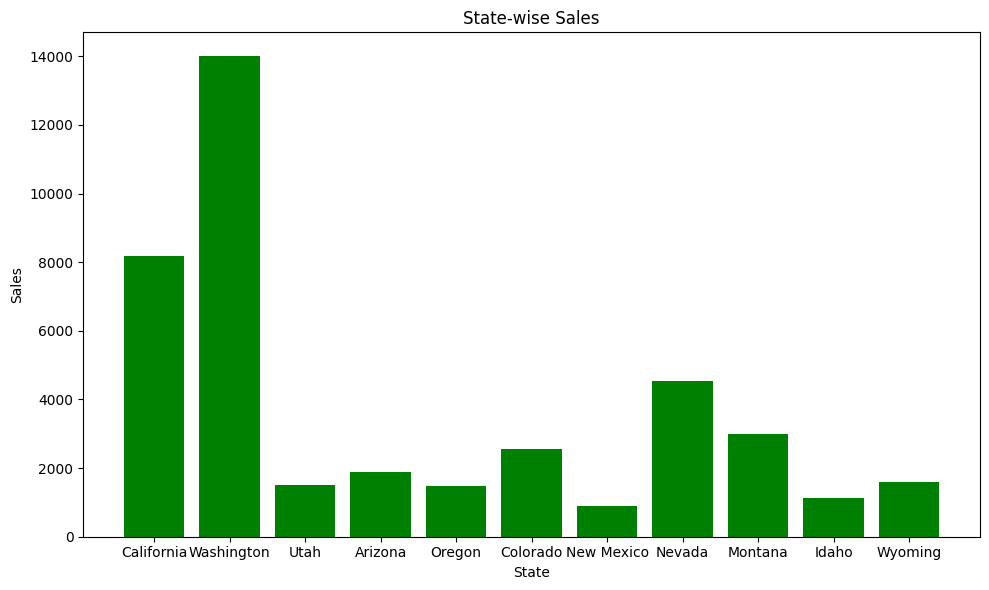

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(amz_data['State'], amz_data['Sales'], color="green")
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("State-wise Sales")
plt.tight_layout()
plt.show()

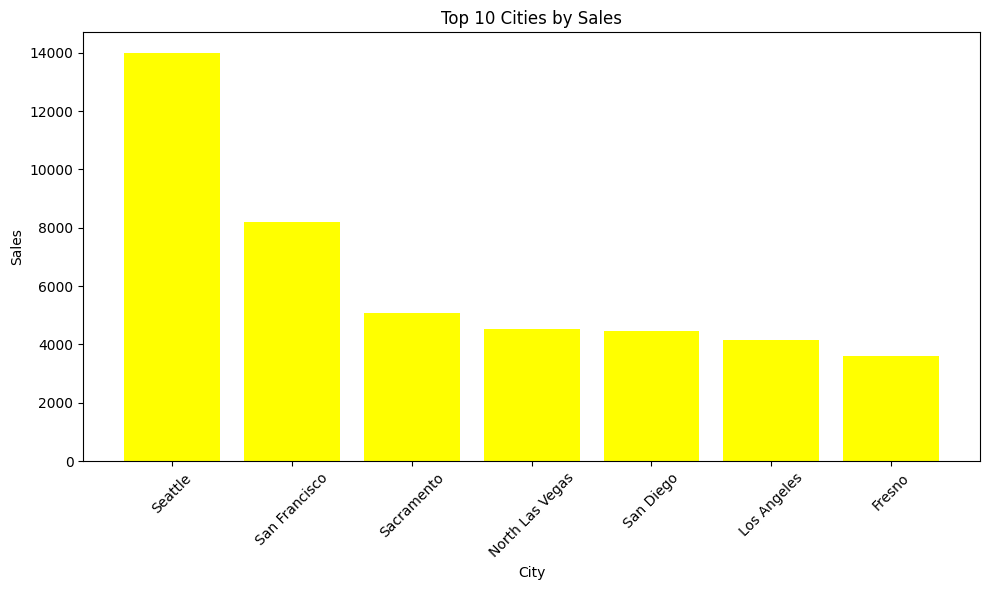

In [ ]:
import matplotlib.pyplot as plt
top_10_cities = amz_data.sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities['City'], top_10_cities['Sales'], color="yellow")
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 10 Cities by Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

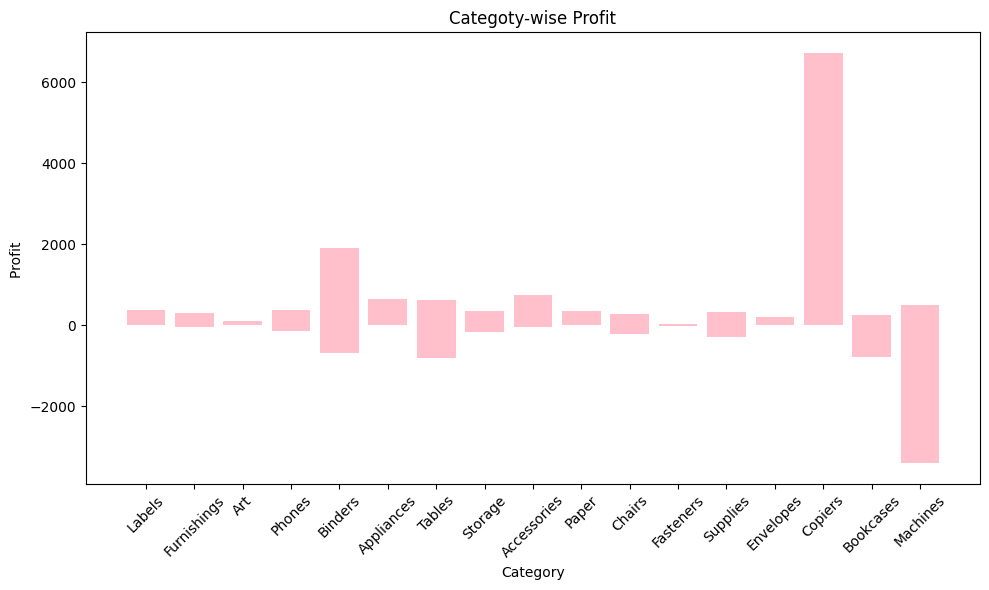

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(amz_data['Category'], amz_data['Profit'], color='pink')
plt.xlabel('Category')
plt.ylabel('Profit ')
plt.title('Categoty-wise Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
average_sales_per_city = amz_data.groupby('City')['Sales'].mean()

print(average_sales_per_city)

City
Albuquerque     158.582857
Anaheim         295.810000
Antioch          19.440000
Apple Valley    273.583000
Arvada          125.850000
                   ...    
Westminster     225.096824
Whittier        444.768000
Woodland         88.220667
Yucaipa          50.800000
Yuma            210.216250
Name: Sales, Length: 169, dtype: float64


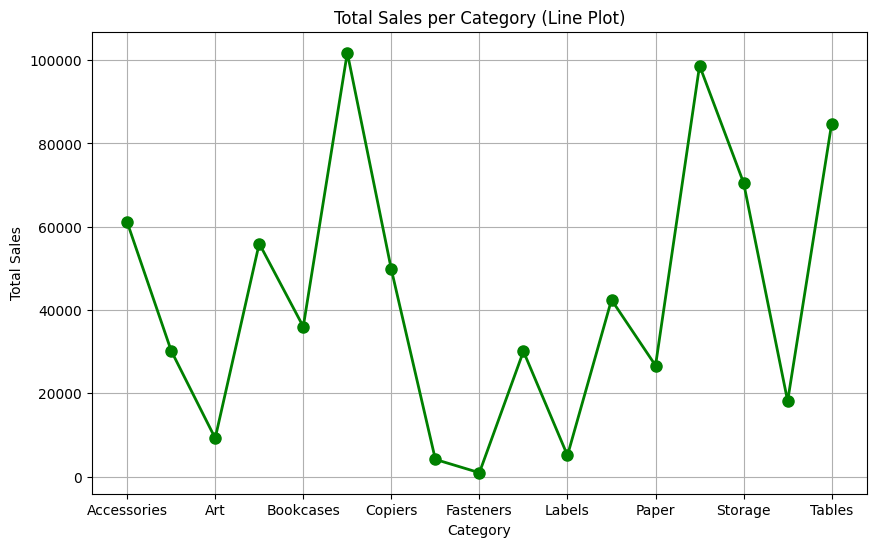

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
category_sales = amz_data.groupby('Category')['Sales'].sum()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Category (Line Plot)')
plt.grid(True)

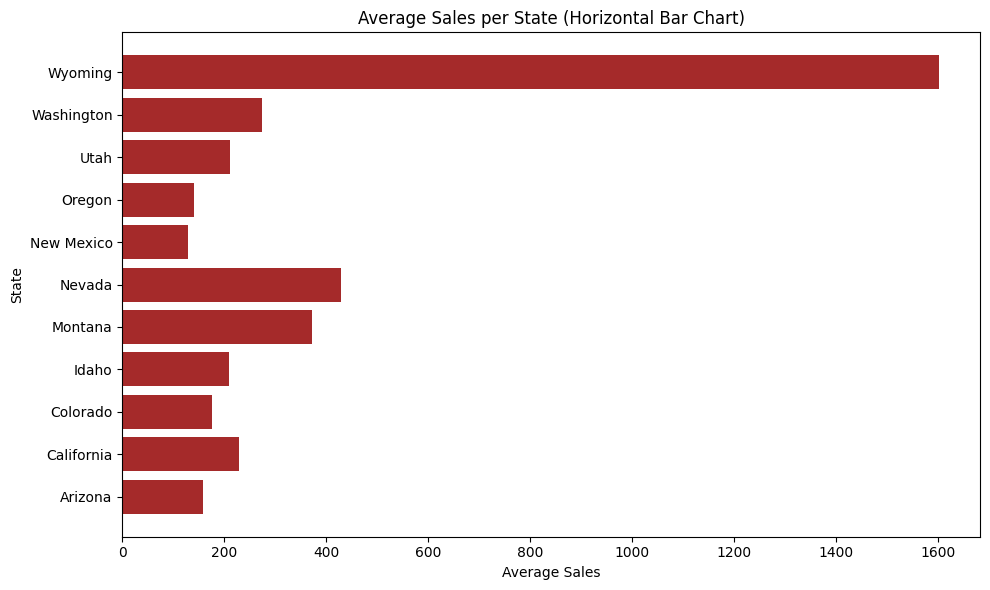

In [ ]:
average_sales_per_state = amz_data.groupby('State')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.barh(average_sales_per_state['State'], average_sales_per_state['Sales'], color='brown')
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.title('Average Sales per State (Horizontal Bar Chart)')
plt.tight_layout()
plt.show()

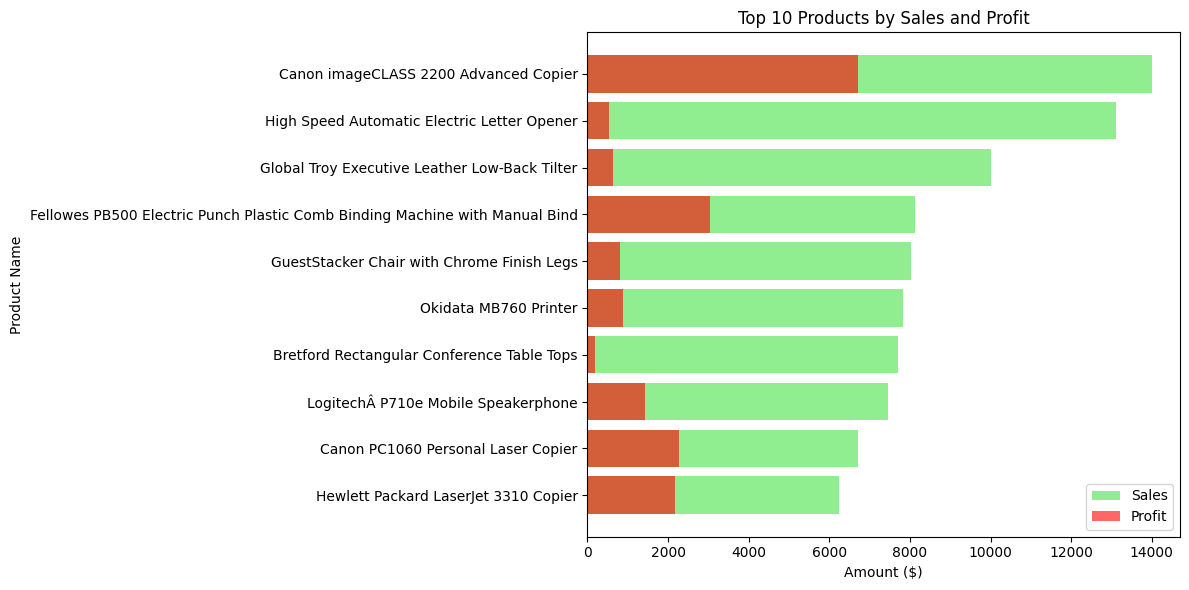

In [ ]:
top_products = amz_data.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
top_products = top_products.sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_products['Product Name'], top_products['Sales'], color='lightgreen', label='Sales')
plt.barh(top_products['Product Name'], top_products['Profit'], color='Red', alpha=0.6, label='Profit')

plt.xlabel('Amount ($)')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Sales and Profit')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [ ]:
average_Profit_per_State = amz_data.groupby('State')['Profit'].mean()
print(average_Profit_per_State)


State
Arizona       -15.303235
California     38.171608
Colorado      -35.867351
Idaho          39.367767
Montana       122.221900
Nevada         85.045279
New Mexico     31.273408
Oregon         -9.600569
Utah           48.047802
Washington     66.013146
Wyoming       100.196000
Name: Profit, dtype: float64


In [ ]:

products_per_date = amz_data.groupby('Order Date').size().reset_index(name='Number of Products')
print(products_per_date)

    Order Date  Number of Products
0   2011-01-07                   1
1   2011-01-14                   3
2   2011-01-19                   1
3   2011-01-20                   4
4   2011-01-21                   2
..         ...                 ...
840 2014-12-25                   6
841 2014-12-26                   3
842 2014-12-29                   6
843 2014-12-30                   5
844 2014-12-31                   3

[845 rows x 2 columns]


In [ ]:
delivery_counts = amz_data['Status'].value_counts()
print("Number of products delivered:")
print("On time:", delivery_counts.get('On time', 0))
print("Delay:", delivery_counts.get('Delay', 0))

Number of products delivered:
On time: 1915
Delay: 1288


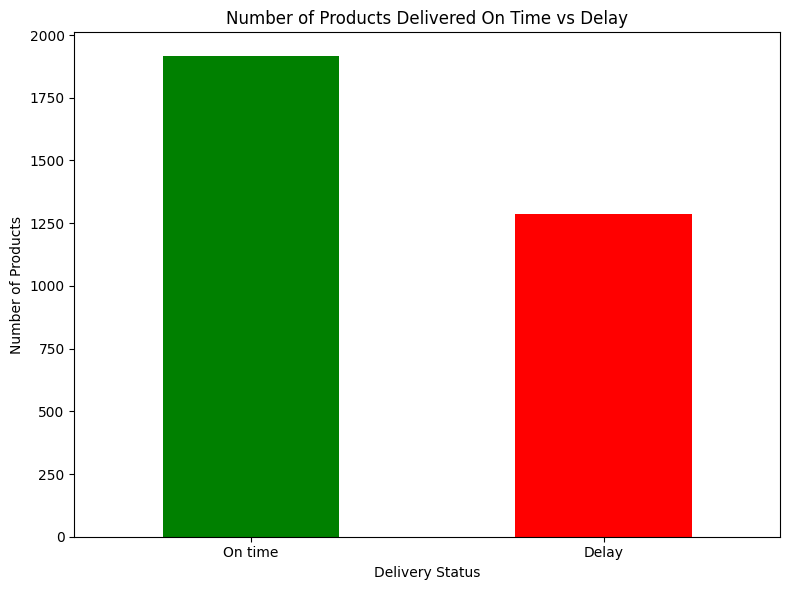

In [ ]:
delivery_counts = amz_data['Status'].value_counts()
plt.figure(figsize=(8, 6))
delivery_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Number of Products Delivered On Time vs Delay')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

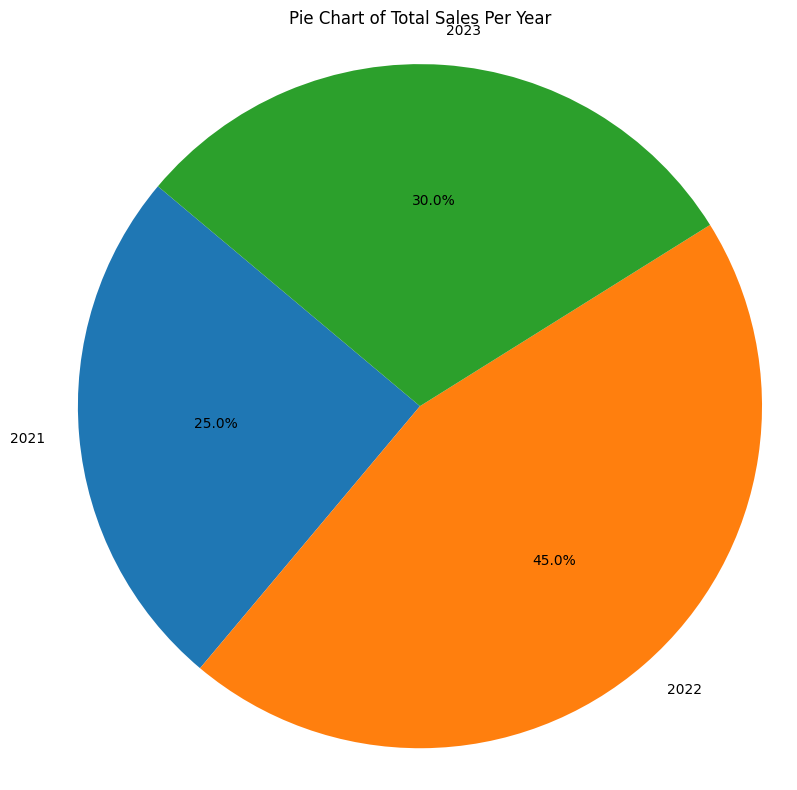

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Year': [2021, 2021, 2022, 2022, 2023],
    'Sales': [1000, 1500, 2000, 2500, 3000]
}
amz_data = pd.DataFrame(data)
amz_data['Sales'] = pd.to_numeric(amz_data['Sales'], errors='coerce')
amz_data = amz_data.dropna(subset=['Sales'])
total_sales_per_year = amz_data.groupby('Year')['Sales'].sum()
if not total_sales_per_year.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(total_sales_per_year, labels=total_sales_per_year.index, autopct='%1.1f%%', startangle=140)
    plt.title('Pie Chart of Total Sales Per Year')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot.")

In [ ]:
no_of_country=amz_data["Country"].nunique()
print(no_of_country)

1


In [ ]:
no_of_state=amz_data['State'].nunique()
print(no_of_state)

11


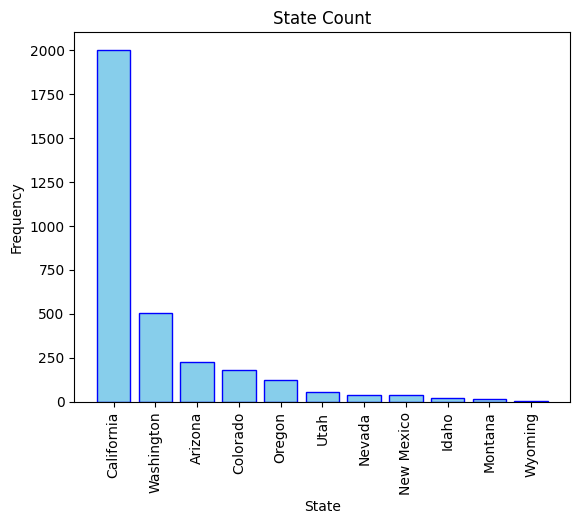

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
state = amz_data["State"]
state_counts = state.value_counts()
plt.bar(state_counts.index, state_counts.values, color='skyblue', edgecolor='blue')
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("State Count")
plt.xticks(rotation=90)
plt.show()
